In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import random as r

In [4]:
import matplotlib.mlab as mlab

In [5]:
import pandas as pd

In [6]:
%matplotlib inline

In [195]:
import itertools

### Задание 1  
1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [86]:
def roulette():
    number = r.randint(0, 36)
    european_rule_red = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16,  1, 14, 9, 18, 7, 12, 3]
    european_rule_black = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
    if number in european_rule_red:
        return f'Выпавший номер {number}, красное.'
    elif number in european_rule_black:
        return f'Выпавший номер {number}, черное.'
    else:
        return f'Выпало zero.'

In [87]:
print(roulette())

Выпало zero.


### Задание 2

1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.



In [88]:
def roulette_2():
    number = r.randint(0, 36)
    european_rule_red = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16,  1, 14, 9, 18, 7, 12, 3]
    european_rule_black = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
    if number in european_rule_red:
        return number, 'r'
    elif number in european_rule_black:
        return number, 'b'
    else:
        return number, 'g'
    

In [89]:
rotations = 10000

In [90]:
result = dict()

for i in range(rotations):
    number, color = roulette_2()
    if number not in result:
        result[number] = 1
    else:
        result[number] += 1

In [91]:
total = 0
print('\033[1m' + 'Ответ:' + '\033[0m')
for key, value in result.items():
    total += value/rotations
    print(f'{key} выпал {value} раз. Что составляет {value * 100/rotations}% или соответствует вероятности {value/rotations}')
print(f'Базовая вероятность составляет 1/37 или {1/37}')
print(f'Сумма всех вероятностей составляет {total} т.к. в общем случае выпадение номеров в рулетке является независимым событием.')

Ответ:
1 выпал 265 раз. Что составляет 2.65% или соответствует вероятности 0.0265
11 выпал 260 раз. Что составляет 2.6% или соответствует вероятности 0.026
29 выпал 250 раз. Что составляет 2.5% или соответствует вероятности 0.025
8 выпал 298 раз. Что составляет 2.98% или соответствует вероятности 0.0298
9 выпал 278 раз. Что составляет 2.78% или соответствует вероятности 0.0278
28 выпал 285 раз. Что составляет 2.85% или соответствует вероятности 0.0285
7 выпал 275 раз. Что составляет 2.75% или соответствует вероятности 0.0275
14 выпал 295 раз. Что составляет 2.95% или соответствует вероятности 0.0295
20 выпал 259 раз. Что составляет 2.59% или соответствует вероятности 0.0259
13 выпал 275 раз. Что составляет 2.75% или соответствует вероятности 0.0275
22 выпал 292 раз. Что составляет 2.92% или соответствует вероятности 0.0292
15 выпал 277 раз. Что составляет 2.77% или соответствует вероятности 0.0277
16 выпал 271 раз. Что составляет 2.71% или соответствует вероятности 0.0271
32 выпал 274 

При увеличении количества вращений рулетки вероятности для каждого из номеров будут приближаться к базовой вероятности.

2. Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

In [92]:
def random_numbers(n):
    return np.random.rand(n)        

In [93]:
k = 1000

In [94]:
result_task2 = []
total_task2 = []
j = 10
for i in range(k):
    numbers = random_numbers(j)
    result_task2.extend(numbers)
    total_task2.append(numbers.sum())

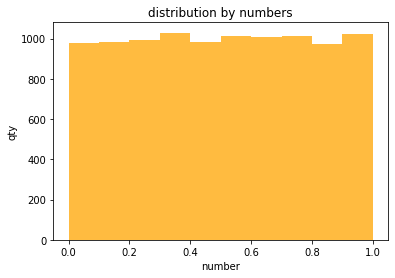

In [95]:
num_bins = 10
n, bins, patches = plt.hist(result_task2, bins = num_bins, facecolor='orange', alpha=0.75)
plt.xlabel('number')
plt.ylabel('qty')
plt.title('distribution by numbers')
plt.show()

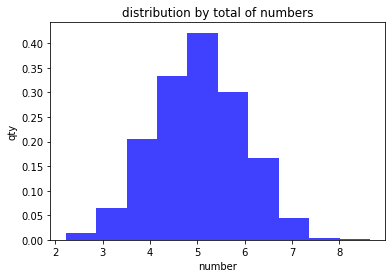

In [96]:
n, bins, patches = plt.hist(total_task2, bins = 10, density=True, facecolor='blue', alpha=0.75)
plt.xlabel('number')
plt.ylabel('qty')
plt.title('distribution by total of numbers')
plt.show()

**Вывод**  
Десяти выборок обсолютно недостаточно для получения результата.  
Рисунок напоминающий нормально распределение появляется при значительно большем количестве выборок (в данном случае 100 взята для примера)

### Задание 3

3.
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.
Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [265]:
count = 0 
total = 4
n = 100
p = 0.5
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == total:
        count += 1

В отличие от исходного расчета вероятность выпадения желаемого результата не равняется 0,5, т.к. мы объединяем результаты четырех серий бросков монеты.

In [266]:
for p in itertools.product("01",repeat=4):
    print(''.join(p))   

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


таким образом, в зависимости от выбранного значения успешного результата вероятность будет колебаться от 1/16 до 1/4.

Было принято count = 4, что означает только один успешный вариант = 1111, т.е. вероятность составляет 1/16.  

In [272]:
# Количество взятых объектов из серии измерений
k=2

In [273]:
# Общее количество сочетаний исходов для сочетаний.       
Ckn = (np.math.factorial(n))/((np.math.factorial(k))*((np.math.factorial(n-k))))        
Ckn

4950.0

In [274]:
# Общее количество сочетаний исходов для размещений.   
Akn = (np.math.factorial(n))/(np.math.factorial(n-k))        
Akn

9900.0

In [275]:
# Вероятность k исходов из n попыток
Pnk = Ckn * (1/16)**k * (1-1/16)**(n-k)

In [276]:
print(f' количество успешных попыток: {count},\n общее количество попыток: {n},\n фактическая вероятность: {count/(n)},\
      \n теоретическая вероятность {Pnk} для {k} взятых объектов')

 количество успешных попыток: 10,
 общее количество попыток: 100,
 фактическая вероятность: 0.1,      
 теоретическая вероятность 0.034637801638318845 для 2 взятых объектов


4. (не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k


In [278]:
for p in itertools.product("123456",repeat=3):
    print(''.join(p))  

111
112
113
114
115
116
121
122
123
124
125
126
131
132
133
134
135
136
141
142
143
144
145
146
151
152
153
154
155
156
161
162
163
164
165
166
211
212
213
214
215
216
221
222
223
224
225
226
231
232
233
234
235
236
241
242
243
244
245
246
251
252
253
254
255
256
261
262
263
264
265
266
311
312
313
314
315
316
321
322
323
324
325
326
331
332
333
334
335
336
341
342
343
344
345
346
351
352
353
354
355
356
361
362
363
364
365
366
411
412
413
414
415
416
421
422
423
424
425
426
431
432
433
434
435
436
441
442
443
444
445
446
451
452
453
454
455
456
461
462
463
464
465
466
511
512
513
514
515
516
521
522
523
524
525
526
531
532
533
534
535
536
541
542
543
544
545
546
551
552
553
554
555
556
561
562
563
564
565
566
611
612
613
614
615
616
621
622
623
624
625
626
631
632
633
634
635
636
641
642
643
644
645
646
651
652
653
654
655
656
661
662
663
664
665
666


In [282]:
for p in itertools.permutations("123456", 2):
    print(''.join(p))  

12
13
14
15
16
21
23
24
25
26
31
32
34
35
36
41
42
43
45
46
51
52
53
54
56
61
62
63
64
65


In [283]:
for p in itertools.combinations("123456", 2):
    print(''.join(p))  

12
13
14
15
16
23
24
25
26
34
35
36
45
46
56


5. (не обязательно) Дополните код расчетом коэффициента корреляции x и y по формуле
 

0.6360674877781385 0.18493649830364814
0.6360674877781386 0.18493649830364817


<ipython-input-294-50059b4f6a05>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a1, b1 = np.linalg.lstsq(A, y)[0]


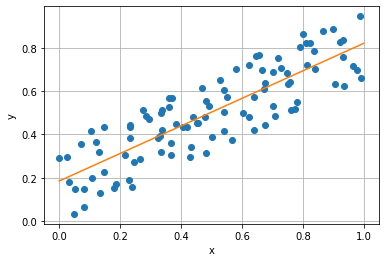

In [294]:
n = 100
r = 0.65
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)

plt.plot([0, 1], [b, a + b])
plt.show()


In [295]:
c = np.corrcoef(x, y)
c

array([[1.        , 0.84923832],
       [0.84923832, 1.        ]])

In [296]:
xm = x.mean()
ym = y.mean()

In [297]:
xm

0.49688799988794324

In [298]:
ym

0.5009908000994762

In [327]:
R = np.sum((x-xm)*(y-ym))/(np.sqrt(np.sum((x-xm)**2)*np.sum((y-ym)**2)))

**Ответ:**

In [328]:
R

0.8492383164166463